# Events 

In [1]:
import pandas
events = pandas.read_json("data/events.json")
events

event  year  \
0                 9/11 September attack  2001   
1                              Iraq War  2003   
2                              Facebook  2004   
3   Indian Ocean earthquake and tsunami  2004   
4                               Twitter  2006   
5                 Apple launches iPhone  2007   
6                       Great Recession  2008   
7                           Arab Spring  2010   
8                                 Ebola  2013   
9           Crimea is annexed by Russia  2014   
10    Legalization of same-sex marriage  2015   
11    Paris Agreement on climate change  2015   
12                      UK votes Brexit  2015   
13                    Covid-19 Pandemic  2015   
14        Invasion of Ukraine by Russia  2022   

                                             keywords  
0         [attack, terror, weapons, mass destruction]  
1   [iraq, war, collateral, patriot, surgical, dea...  
2                   [facebook, profile, like, friend]  
3            [tsunami, earthquake, cataclysm, deaths]  
4                           [twitter, tweet, retweet]  
5                             [apple, iphone, selfie]  
6   [crisis, debt, economic, financial, money, ban...  
7   [revolution, arab, egypt, tunisia, libya, prot...  
8                             [ebola, virus, malaria]  
9               [crimea, russia, ukraine, autonomous]  
10                        [legal, lgbt, lesbian, gay]  
11            [paris, climate, global warming, earth]  
12  [brexit, uk, david cameron, united kingdom, eu...  
13  [pandemic, covid-19, virus, vaccine, coronavir...  
14  [ukraine, russia, nuclear, deaths, donetsk, mi...

In [ ]:
import pytrends
kw_list0 = events.event[4]

pytrends = TrendReq(hl='en-US', tz=360)
pytrends.build_payload(kw_list0, cat=0, timeframe='all')

In [82]:
pytrends.interest_over_time()

attack  terror  weapons  mass destruction  isPartial
date                                                            
2004-01-01      14       6       22                10      False
2004-02-01      14       6       19                 8      False
2004-03-01      14       7       43                25      False
2004-04-01      14       6      100                83      False
2004-05-01      13       7       65                50      False
...            ...     ...      ...               ...        ...
2021-12-01      16       5        5                 0      False
2022-01-01      24       6        5                 0      False
2022-02-01      28       5        8                 0      False
2022-03-01      23       5       10                 0      False
2022-04-01      29       5        6                 0       True

[220 rows x 5 columns]

<AxesSubplot:xlabel='Year', ylabel='US Search Popularity'>

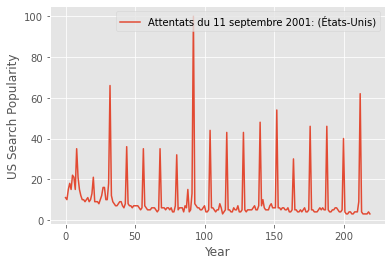

In [88]:
event0 = pandas.read_csv('data/gtrends/0.csv',header=1)

def plot_trends(event_df):
    plot = plt.figure().add_subplot()
    event_df.plot(ax=plot)
    plt.xlabel('Year')
    plt.ylabel('US Search Popularity')
    return plot

plot_trends(event0)

# Genres

 ## Scraping

In [ ]:
# Source : https://github.com/kevinschaich/billboard

import musicbrainzngs as m
m.set_useragent("Wizards", "0.1", "fatih.mutlu@epfl.ch")

def get_tags(artist):
    try :
        artist_id = m.search_artists(artist)['artist-list'][0]['id']
    except IndexError:
        return None, False
    
    try : 
        tags = m.get_artist_by_id(artist_id, includes=["tags"])['artist']["tag-list"]
    except (UnboundLocalError, KeyError) :
        return None, False
    return [tag['name'] for tag in tags], True

In [ ]:
import pandas
import numpy
unique_artists = numpy.unique(pandas.read_csv('data/charts_added.csv').artist.values)

In [ ]:
artist_genres = dict()
not_found_artists = []

for i in range(0,len(unique_artists)):
    genres, success = get_tags(unique_artists[i])
    
    if i == 10:
        print(i)
    if i%100 == 0: 
        print(i)
        
    if success:
        artist_genres[unique_artists[i]]=genres
        #print(unique_artists[i])
    else : 
        not_found_artists.append(unique_artists[i])
        #print(unique_artists[i])
    
# Took ~6 hours to finish 

In [3]:
import pickle
with open('not_found_artists.pkl', 'rb') as f:
    not_found_artists = pickle.load(f) # artists not found on musicbrainzngs

## EDA

In [4]:
artist_genres_df = pandas.read_json("data/artist_genres.json")

In [5]:
artist_genres_df.head()

artist                                             genres
0           "Groove" Holmes              [hard bop, jazz and blues, soul jazz]
1       "Weird Al" Yankovic  [accordion, american, comedy, comedy rock, par...
2  'N Sync & Gloria Estefan  [adult contemporary, american, bolero, conga, ...
3   'N Sync Featuring Nelly  [boy band, dance-pop, pop, pop and chart, pop ...
4              'Til Tuesday                       [alternative rock, new wave]

In [20]:
list(artist_genres_df.genres.values)[0]

['hard bop', 'jazz and blues', 'soul jazz']

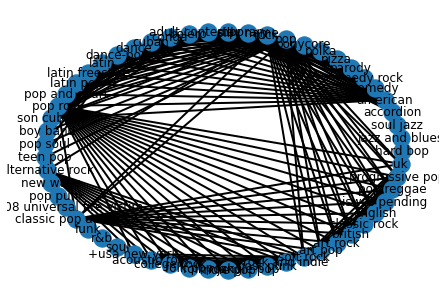

In [21]:
import itertools
import networkx as nx
G = nx.Graph()

genres_relations = list(artist_genres_df.genres.values)

for i in range(0, 10):
    G.add_nodes_from(genres_relations[i])
    G.add_edges_from(itertools.combinations(genres_relations[i],2))
    
nx.draw_circular(G,with_labels=True,width=2)

There are many subgenres in the dataset that aren't useful for the purpose of this graph. We will later aggregate them so that this graph becomes readable. 